<a href="https://colab.research.google.com/github/orenchausho99/Air-Pollution-Analysis-by-Settlement-Type-Python-/blob/main/air_pollution_by_settlement_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
pollution_df = pd.read_csv('pollution_df - גיליון1 (1).csv')
pollution_df.head(10)

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude
0,Afula,City,38.5,21.4,-,40.1,30.1,6.2,-,-,32.609070,35.289200
1,Ariel,City,22.5,11.6,-,59.3,35.5,6.4,-,77,32.106500,35.184500
2,Beer Sheva,City,49.4,22.1,-,51.6,50.4,5.85,14.6,83.15,31.251800,34.791300
3,Bet Shemesh,City,25.4,14.8,-,54.25,37.7,10.6,-,93.1,31.745560,34.986670
4,Karmiel,City,24.9,11.7,-,64,34.8,3.9,-,107.2,32.919945,35.290146
5,Jerusalem,City,28.96666667,31.6,12.4,62.6,33.4,14.775,12.73333333,99.1,31.771959,35.217018
6,Alon Shvut,Yeshuv,23.3,9.3,11.3,76.4,24.8,2.6,3.9,102.3,31.654871,35.125256
7,Holon,City,-,35.3,17.2,-,-,7.5,15.5,-,32.016700,34.766700
8,Rehovot,City,26.2,22.6,-,55.4,37.3,7.5,-,95.6,31.894800,34.811300
9,Tel Aviv,City,37.5,37.2,17.8,42.025,35.25,9.95,17.7,87.825,32.085300,34.781800


In [ ]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   settlement name  78 non-null     object 
 1   settlement type  78 non-null     object 
 2   PM10 January     77 non-null     object 
 3   NO2 January      73 non-null     object 
 4   PM2.5 January    78 non-null     object 
 5   O3 January       78 non-null     object 
 6   PM10 July        78 non-null     object 
 7   NO2 July         78 non-null     object 
 8   PM2.5 July       78 non-null     object 
 9   O3 July          78 non-null     object 
 10  latitude         78 non-null     float64
 11  longtitude       78 non-null     float64
dtypes: float64(2), object(10)
memory usage: 7.4+ KB


# Initial DF Proccecing

In [ ]:
(pollution_df == "-").sum().sum()

np.int64(244)

In [ ]:
# replacing the "-" with NaN
pollution_df.replace("-", 0, inplace=True)

In [ ]:
(pollution_df == "-").sum().sum()

np.int64(0)

In [ ]:
pollution_df.head()

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude
0,Afula,City,38.5,21.4,0,40.1,30.1,6.2,0,0,32.609070,35.289200
1,Ariel,City,22.5,11.6,0,59.3,35.5,6.4,0,77,32.106500,35.184500
2,Beer Sheva,City,49.4,22.1,0,51.6,50.4,5.85,14.6,83.15,31.251800,34.791300
3,Bet Shemesh,City,25.4,14.8,0,54.25,37.7,10.6,0,93.1,31.745560,34.986670
4,Karmiel,City,24.9,11.7,0,64,34.8,3.9,0,107.2,32.919945,35.290146


Netanya - stetions did not worked in 2024 <br>
Dehi - Classefied as village

In [ ]:
pollution_df = pollution_df[pollution_df['settlement name'] != 'Dehi']
pollution_df = pollution_df[pollution_df['settlement name'] != 'Netanya']

In [ ]:
# settlements arrays
pollution_df['settlement type'].value_counts()

,count
settlement type,
City,32
Yeshuv,16
Kibbutz,15
Moshav,13


In [ ]:
pollution_df

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude
0,Afula,City,38.5,21.4,0,40.1,30.1,6.2,0,0,32.609070,35.289200
1,Ariel,City,22.5,11.6,0,59.3,35.5,6.4,0,77,32.106500,35.184500
2,Beer Sheva,City,49.4,22.1,0,51.6,50.4,5.85,14.6,83.15,31.251800,34.791300
3,Bet Shemesh,City,25.4,14.8,0,54.25,37.7,10.6,0,93.1,31.745560,34.986670
4,Karmiel,City,24.9,11.7,0,64,34.8,3.9,0,107.2,32.919945,35.290146
...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ahuzat Barak,Yeshuv,0,10.1,0,43.8,0,2.4,0,33.5,32.616700,35.300000
74,Ein Dor,Kibbutz,0,15.1,14.4,39.6,0,1.5,0,88.7,32.650000,35.400000
75,Kahal,Moshav,33.8,0,0,0,50.8,0,0,0,32.933300,35.533300
76,Rosh Haayin,City,0,15.1,14.4,60.2,0,9,15.8,96,32.083300,34.950000


# ppb & ppm convertion

In [ ]:
# NO2 convertion
# mw = משקל מולר
def ugm3_to_ppb(ugm3, mw=46.01):
    if pd.isna(ugm3):
        return 0
    try:
        return (float(ugm3) * 24.45 / (mw * 1000)) * 1000
    except:
        return 0

pollution_df['NO2 January'] = pollution_df['NO2 January'].apply(ugm3_to_ppb)
pollution_df['NO2 July'] = pollution_df['NO2 July'].apply(ugm3_to_ppb)


pollution_df.head(10)

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude
0,Afula,City,38.5,11.372093,0,40.1,30.1,3.294719,0,0,32.609070,35.289200
1,Ariel,City,22.5,6.164312,0,59.3,35.5,3.401000,0,77,32.106500,35.184500
2,Beer Sheva,City,49.4,11.744077,0,51.6,50.4,3.108726,14.6,83.15,31.251800,34.791300
3,Bet Shemesh,City,25.4,7.864812,0,54.25,37.7,5.632906,0,93.1,31.745560,34.986670
4,Karmiel,City,24.9,6.217453,0,64,34.8,2.072484,0,107.2,32.919945,35.290146
5,Jerusalem,City,28.96666667,16.792436,12.4,62.6,33.4,7.851527,12.73333333,99.1,31.771959,35.217018
6,Alon Shvut,Yeshuv,23.3,4.942078,11.3,76.4,24.8,1.381656,3.9,102.3,31.654871,35.125256
7,Holon,City,0,18.758639,17.2,0,0,3.985547,15.5,0,32.016700,34.766700
8,Rehovot,City,26.2,12.009780,0,55.4,37.3,3.985547,0,95.6,31.894800,34.811300
9,Tel Aviv,City,37.5,19.768311,17.8,42.025,35.25,5.287492,17.7,87.825,32.085300,34.781800


In [ ]:
# O3 convertion
def ugm3_to_ppm(ugm3, mw=48):
    if pd.isna(ugm3):
        return 0
    try:
        return (float(ugm3) * 24.45 / (mw * 1000))
    except:
        return 0

pollution_df['O3 January'] = pollution_df['O3 January'].apply(ugm3_to_ppm)
pollution_df['O3 July'] = pollution_df['O3 July'].apply(ugm3_to_ppm)


pollution_df.head(10)

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude
0,Afula,City,38.5,11.372093,0,0.020426,30.1,3.294719,0,0.000000,32.609070,35.289200
1,Ariel,City,22.5,6.164312,0,0.030206,35.5,3.401000,0,0.039222,32.106500,35.184500
2,Beer Sheva,City,49.4,11.744077,0,0.026284,50.4,3.108726,14.6,0.042355,31.251800,34.791300
3,Bet Shemesh,City,25.4,7.864812,0,0.027634,37.7,5.632906,0,0.047423,31.745560,34.986670
4,Karmiel,City,24.9,6.217453,0,0.032600,34.8,2.072484,0,0.054605,32.919945,35.290146
5,Jerusalem,City,28.96666667,16.792436,12.4,0.031887,33.4,7.851527,12.73333333,0.050479,31.771959,35.217018
6,Alon Shvut,Yeshuv,23.3,4.942078,11.3,0.038916,24.8,1.381656,3.9,0.052109,31.654871,35.125256
7,Holon,City,0,18.758639,17.2,0.000000,0,3.985547,15.5,0.000000,32.016700,34.766700
8,Rehovot,City,26.2,12.009780,0,0.028219,37.3,3.985547,0,0.048696,31.894800,34.811300
9,Tel Aviv,City,37.5,19.768311,17.8,0.021406,35.25,5.287492,17.7,0.044736,32.085300,34.781800


# EPA IQA Grading

AQI library inmportetion

In [ ]:
pip install python-aqi

  Preparing metadata (setup.py) ... done
  Created wheel for python-aqi: filename=python_aqi-0.6.1-py3-none-any.whl size=9649 sha256=45c2065bd5805632795a42755278a1e622bdbad5e012568a1cb7795172877312
  Stored in directory: /root/.cache/pip/wheels/71/8a/aa/fba3c1469cc9480c9c0666532292f801806f1cc079ff7cdd3b
Successfully built python-aqi


In [ ]:
import aqi

In [ ]:
pollution_df["AQI_Winter"] = 0
pollution_df["AQI_Summer"] =0
pollution_df["AQI_Avg"] = 0

pollution_df.head(10)

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude,AQI_Winter,AQI_Summer,AQI_Avg
0,Afula,City,38.5,11.372093,0,0.020426,30.1,3.294719,0,0.000000,32.609070,35.289200,0,0,0
1,Ariel,City,22.5,6.164312,0,0.030206,35.5,3.401000,0,0.039222,32.106500,35.184500,0,0,0
2,Beer Sheva,City,49.4,11.744077,0,0.026284,50.4,3.108726,14.6,0.042355,31.251800,34.791300,0,0,0
3,Bet Shemesh,City,25.4,7.864812,0,0.027634,37.7,5.632906,0,0.047423,31.745560,34.986670,0,0,0
4,Karmiel,City,24.9,6.217453,0,0.032600,34.8,2.072484,0,0.054605,32.919945,35.290146,0,0,0
5,Jerusalem,City,28.96666667,16.792436,12.4,0.031887,33.4,7.851527,12.73333333,0.050479,31.771959,35.217018,0,0,0
6,Alon Shvut,Yeshuv,23.3,4.942078,11.3,0.038916,24.8,1.381656,3.9,0.052109,31.654871,35.125256,0,0,0
7,Holon,City,0,18.758639,17.2,0.000000,0,3.985547,15.5,0.000000,32.016700,34.766700,0,0,0
8,Rehovot,City,26.2,12.009780,0,0.028219,37.3,3.985547,0,0.048696,31.894800,34.811300,0,0,0
9,Tel Aviv,City,37.5,19.768311,17.8,0.021406,35.25,5.287492,17.7,0.044736,32.085300,34.781800,0,0,0


The calculate_row_aqi function calculates the Air Quality Index (AQI) for a single row of data using pollutant values specified in pollutant_cols. It prepares a list of pollutant-value pairs, handles invalid or missing data, and returns the highest AQI value among the pollutants using the specified algorithm (default is EPA). If no valid data is available or an error occurs, it returns NaN.












In [ ]:
def calculate_row_aqi(row, pollutant_cols, algo=aqi.ALGO_EPA):
    pollutants_data = []
    for col_name, pollutant_type in pollutant_cols.items():
        value = row[col_name]
        try:
            pollutants_data.append((pollutant_type, str(value)))
        except ValueError:
            continue

    if not pollutants_data:
        return np.nan

    try:
        return aqi.to_aqi(pollutants_data, algo=algo)
    except Exception as e:
        print(f"שגיאה בחישוב AQI עבור שורה: {row.name}, שגיאה: {e}")
        return np.nan

Runninig the calculate_row_aqi function on every row and every pollotent

In [ ]:
winter_pollutants = {
    'PM10 January': aqi.POLLUTANT_PM10,
    'NO2 January': aqi.POLLUTANT_NO2_1H,
    'PM2.5 January': aqi.POLLUTANT_PM25,
    'O3 January': aqi.POLLUTANT_O3_8H
}

summer_pollutants = {
    'PM10 July': aqi.POLLUTANT_PM10,
    'NO2 July': aqi.POLLUTANT_NO2_1H,
    'PM2.5 July': aqi.POLLUTANT_PM25,
    'O3 July': aqi.POLLUTANT_O3_8H
}

pollution_df['AQI_Winter'] = pollution_df.apply(lambda row: calculate_row_aqi(row, winter_pollutants), axis=1)

pollution_df['AQI_Summer'] = pollution_df.apply(lambda row: calculate_row_aqi(row, summer_pollutants), axis=1)

pollution_df['AQI_Avg'] = pollution_df[['AQI_Winter', 'AQI_Summer']].mean(axis=1)



שגיאה בחישוב AQI עבור שורה: 53, שגיאה: [<class 'decimal.InvalidOperation'>]


DF after AQI Caculations

In [ ]:
pollution_df.head(10)

,settlement name,settlement type,PM10 January,NO2 January,PM2.5 January,O3 January,PM10 July,NO2 July,PM2.5 July,O3 July,latitude,longtitude,AQI_Winter,AQI_Summer,AQI_Avg
0,Afula,City,38.5,11.372093,0,0.020426,30.1,3.294719,0,0.000000,32.609070,35.289200,35,28,31.5
1,Ariel,City,22.5,6.164312,0,0.030206,35.5,3.401000,0,0.039222,32.106500,35.184500,25,33,29.0
2,Beer Sheva,City,49.4,11.744077,0,0.026284,50.4,3.108726,14.6,0.042355,31.251800,34.791300,45,56,50.5
3,Bet Shemesh,City,25.4,7.864812,0,0.027634,37.7,5.632906,0,0.047423,31.745560,34.986670,23,40,31.5
4,Karmiel,City,24.9,6.217453,0,0.032600,34.8,2.072484,0,0.054605,32.919945,35.290146,27,46,36.5
5,Jerusalem,City,28.96666667,16.792436,12.4,0.031887,33.4,7.851527,12.73333333,0.050479,31.771959,35.217018,52,52,52.0
6,Alon Shvut,Yeshuv,23.3,4.942078,11.3,0.038916,24.8,1.381656,3.9,0.052109,31.654871,35.125256,47,44,45.5
7,Holon,City,0,18.758639,17.2,0.000000,0,3.985547,15.5,0.000000,32.016700,34.766700,62,58,60.0
8,Rehovot,City,26.2,12.009780,0,0.028219,37.3,3.985547,0,0.048696,31.894800,34.811300,24,41,32.5
9,Tel Aviv,City,37.5,19.768311,17.8,0.021406,35.25,5.287492,17.7,0.044736,32.085300,34.781800,63,63,63.0


In [ ]:
print(pollution_df.shape)

(76, 15)


# visualization

<Axes: xlabel='settlement name', ylabel='AQI_Avg'>

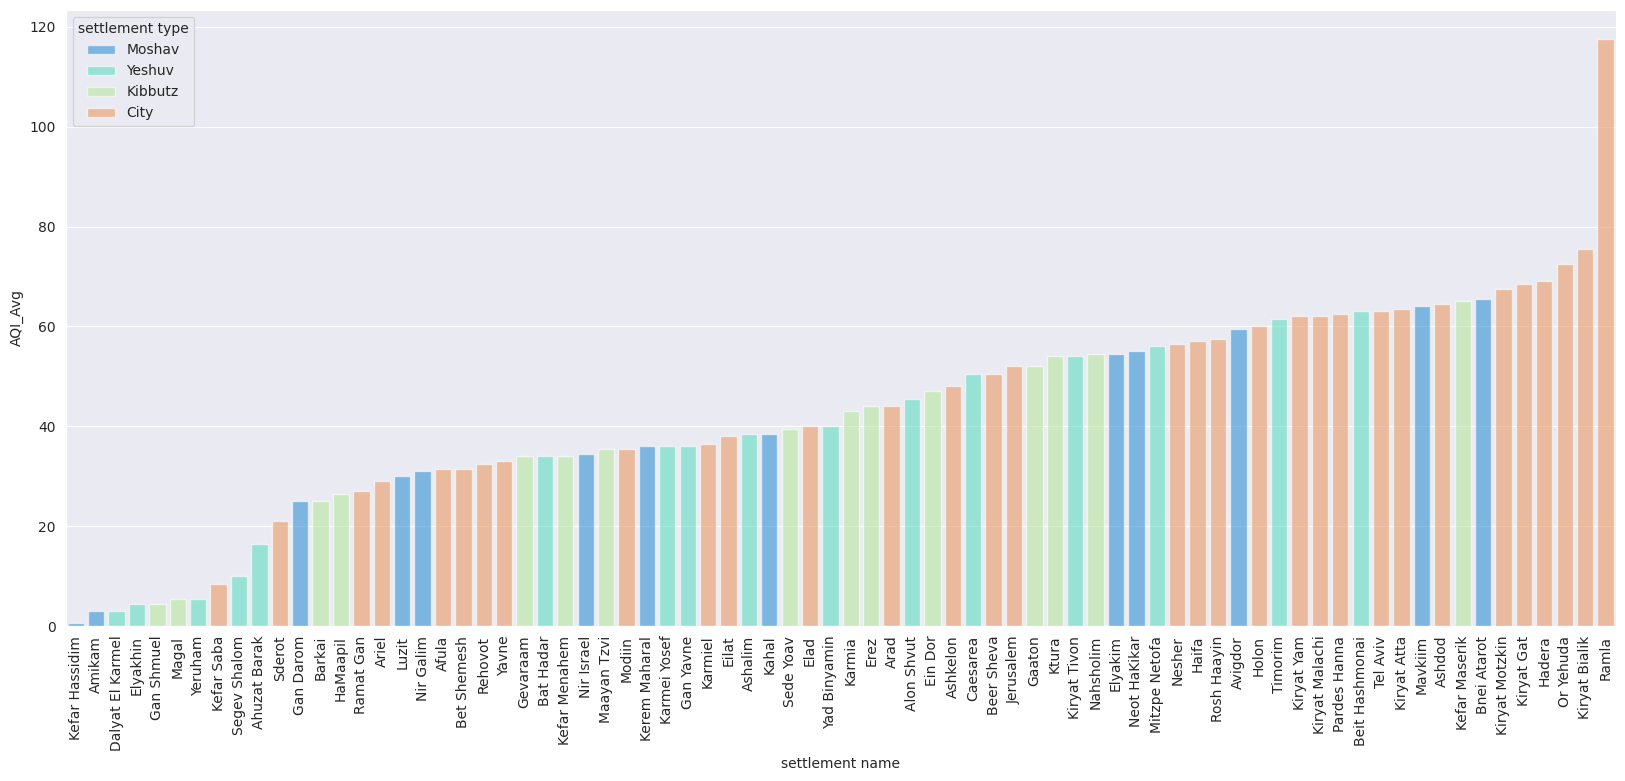

In [ ]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.barplot(data=pollution_df.sort_values(by="AQI_Avg") , x='settlement name', y='AQI_Avg',hue='settlement type',alpha=0.6,palette="rainbow")

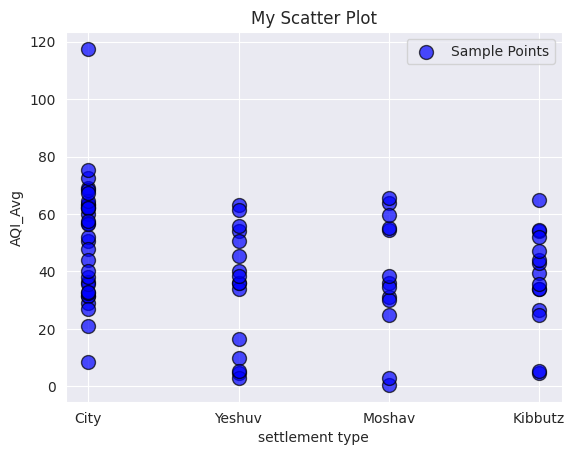

In [ ]:
x = pollution_df['settlement type']
y = pollution_df['AQI_Avg']

plt.scatter(x, y, color='blue', s=100, alpha=0.7, edgecolors='black', label='Sample Points')

plt.xlabel('settlement type')
plt.ylabel('AQI_Avg')

plt.title('My Scatter Plot')

plt.legend()
plt.grid(True)
plt.show()

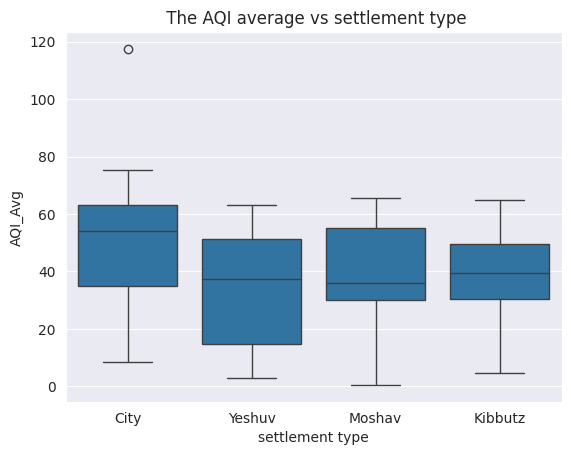

In [ ]:
sns.boxplot(x='settlement type', y='AQI_Avg', data= pollution_df)
plt.title(' The AQI average vs settlement type')
plt.show()

# Statistical testing

shapiro wilk test

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(pollution_df["AQI_Avg"])
print(f"Column: {'AQI_Avg'} → W={stat:.3f}, p={p:.3f}")
if p > 0.05:
 print("Probably normal")
else:
 print("Probably not normal")

Column: AQI_Avg → W=0.955, p=0.009
Probably not normal


In [ ]:
df_city = pollution_df[pollution_df['settlement type'] == 'City']
df_yeshuv = pollution_df[pollution_df['settlement type'] == 'Yeshuv']
df_kibbutz = pollution_df[pollution_df['settlement type'] == 'Kibbutz']
df_moshav = pollution_df[pollution_df['settlement type'] == 'Moshav']

Original data kruskal test

In [ ]:
city_arr = df_city['AQI_Avg'].to_numpy()
yeshuv_arr = df_yeshuv['AQI_Avg'].to_numpy()
kibbutz_arr = df_kibbutz['AQI_Avg'].to_numpy()
moshav_arr = df_moshav['AQI_Avg'].to_numpy()
all_arrays = np.concatenate((city_arr,yeshuv_arr,kibbutz_arr,moshav_arr)) # union all the arrays into one

from scipy.stats import kruskal

original_test = kruskal(city_arr,yeshuv_arr,kibbutz_arr,moshav_arr)
p_value = original_test.pvalue
print(p_value)

0.05576126098073982


BSed data kruskal test

In [ ]:
x= np.empty(10000)
for i in range(0,10000):
 y1 =np.random.choice(all_arrays,size=np.size(city_arr))
 y2 =np.random.choice(all_arrays,size=np.size(yeshuv_arr))
 y3 =np.random.choice(all_arrays,size=np.size(kibbutz_arr))
 y4 =np.random.choice(all_arrays,size=np.size(moshav_arr))

 bs_test = kruskal(y1,y2,y3,y4)
 x[i] = bs_test.pvalue

print(np.sum(x<=p_value)/10000)


0.0532


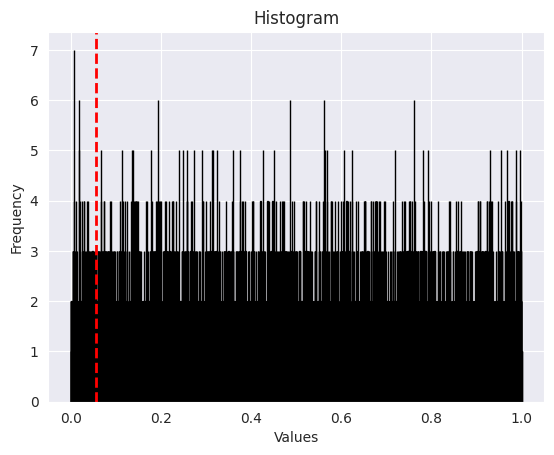

In [ ]:
plt.hist(x=x ,bins=10000, edgecolor='black', density=True)
plt.axvline(x=p_value, color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Post - Hoc

In [ ]:
from scipy.stats import mannwhitneyu

city_arr = df_city['AQI_Avg'].astype(float)
yeshuv_arr = df_yeshuv['AQI_Avg'].astype(float)
kibbutz_arr = df_kibbutz['AQI_Avg'].astype(float)
moshav_arr = df_moshav['AQI_Avg'].astype(float)

arr_array = [city_arr, yeshuv_arr, kibbutz_arr, moshav_arr]
arr_names = ['City', 'Yeshuv', 'Kibbutz', 'Moshav']

for i in range(len(arr_array)):
    for j in range(i + 1, len(arr_array)):
        stat, p = mannwhitneyu(arr_array[i], arr_array[j], alternative='two-sided')
        print(f'Comparing {arr_names[i]} vs {arr_names[j]}:')
        print(f'Statistics={stat:.3f}, p={p:.3f}')
        if p > 0.05:
            print('Probably the same distribution (H0)\n')
        else:
            print('Probably different distributions (H1)\n')


Comparing City vs Yeshuv:
Statistics=358.500, p=0.026
Probably different distributions (H1)

Comparing City vs Kibbutz:
Statistics=329.500, p=0.042
Probably different distributions (H1)

Comparing City vs Moshav:
Statistics=276.000, p=0.091
Probably the same distribution (H0)

Comparing Yeshuv vs Kibbutz:
Statistics=115.500, p=0.874
Probably the same distribution (H0)

Comparing Yeshuv vs Moshav:
Statistics=99.000, p=0.843
Probably the same distribution (H0)

Comparing Kibbutz vs Moshav:
Statistics=94.000, p=0.890
Probably the same distribution (H0)



# Clustering

In [ ]:
pollution_df = pollution_df[pollution_df['settlement name'] != 'Ramla']
clustering_df = pollution_df.drop(columns=['settlement name','settlement type',	'PM10 January',	'NO2 January',	'PM2.5 January',	'O3 January',	'PM10 July',	'NO2 July'	,'PM2.5 July',	'O3 July','AQI_Winter'	,'AQI_Summer'])

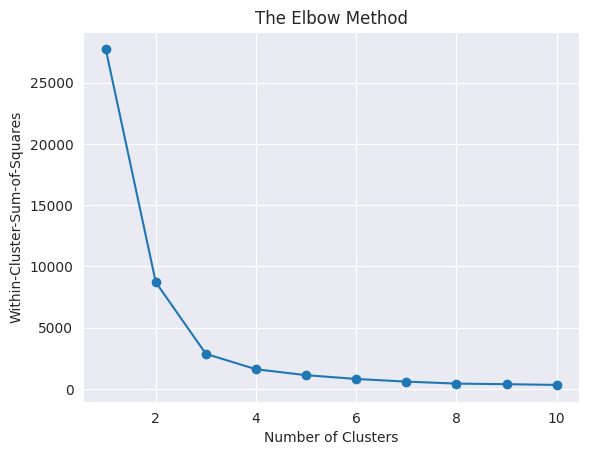

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

In [ ]:
X = clustering_df.values
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
clusteted=GaussianMixture(n_components=3).fit(X)
preds=clusteted.predict(X)
print(f'KMeans Score: {silhouette_score(X,y_kmeans)}')
print(f'Gaussian Mixture Score: {silhouette_score(X,preds)}')

KMeans Score: 0.667771740043482
Gaussian Mixture Score: 0.6142015159081353


In [ ]:
details = [(name,cluster) for name, cluster in zip(clustering_df['AQI_Avg'],y_kmeans)]
labels =['AQI_Avg', 'Cluster']
resultdf = pd.DataFrame.from_records(details, columns=labels)

In [ ]:
clustering_df['Cluster'] = resultdf['Cluster']
clustering_df.head()

,latitude,longtitude,AQI_Avg,Cluster
0,32.609070,35.289200,31.5,1.0
1,32.106500,35.184500,29.0,1.0
2,31.251800,34.791300,50.5,0.0
3,31.745560,34.986670,31.5,1.0
4,32.919945,35.290146,36.5,1.0


In [ ]:
clustering_df['Cluster'].value_counts()

,count
Cluster,
1.0,31
0.0,31
2.0,10


In [ ]:
cluster_means = clustering_df.groupby('Cluster')['AQI_Avg'].mean()
aqi_values = clustering_df['AQI_Avg'].values
percentiles = cluster_means.apply(lambda x: np.round((np.sum(aqi_values < x) / len(aqi_values)) * 100, 2))
print(percentiles)

Cluster
0.0    54.67
1.0    44.00
2.0    56.00
Name: AQI_Avg, dtype: float64


/tmp/ipython-input-41-2551071519.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 0],


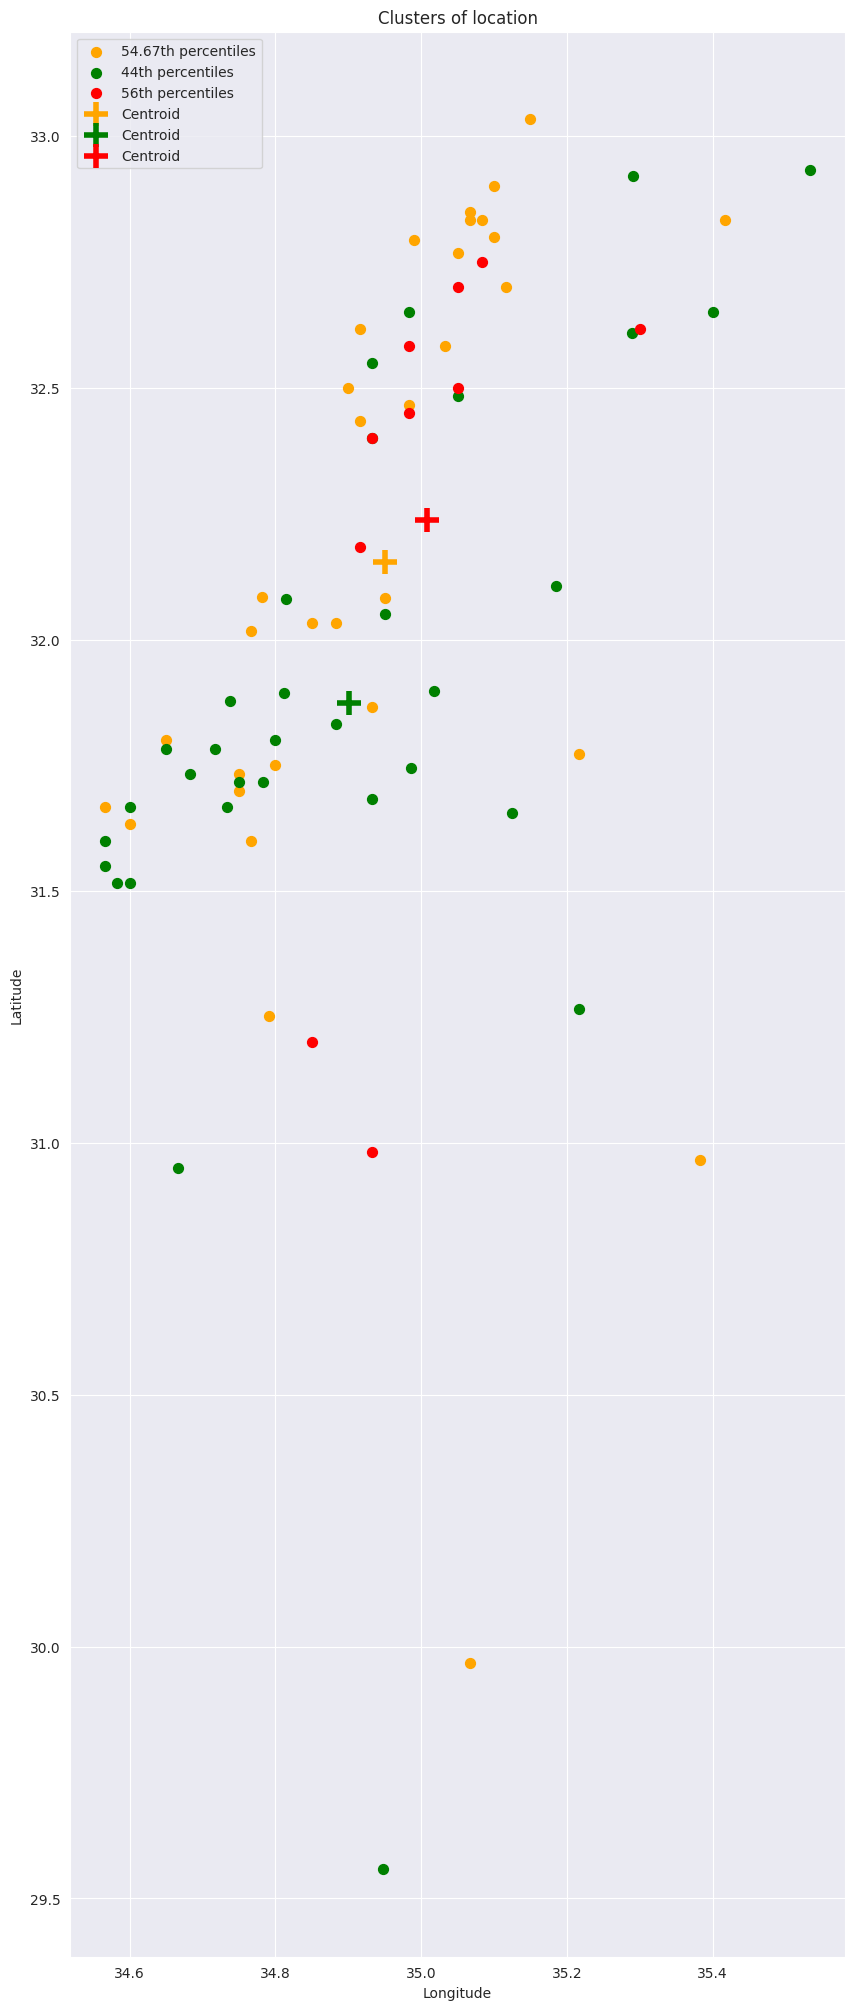

In [ ]:
plt.figure(figsize=(10, 25))

plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 0], s=50, c='orange', label='54.67th percentiles')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 0], s=50, c='green', label='44th percentiles')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 0], s=50, c='red', label='56th percentiles')

colors = ['orange', 'green', 'red']
for i in range(3):
    plt.scatter(kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 0],
                s=300, c=colors[i], marker='+', edgecolors='black', linewidths=4, label=f'Centroid')

plt.title('Clusters of location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()